# Customer Segmentation with RFM Analysis

RFM analysis is a technique used for segmenting the customers based on their recency, frequency and monetary scores.  
It is a useful analysis for determination of marketing and sales strategies.  

Dataset used in the analysis for this notebook and the explanations about the data can be found in the link  
--> https://www.kaggle.com/kabilan45/online-retail-ii-dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from matplotlib import pyplot as plt

# to display all columns and rows:
pd.set_option('display.max_columns', None); 
pd.set_option('display.max_rows', None);

# setting the number of digits after the comma
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt

online_retail_2010_2011 = pd.read_excel("../input/uci-online-retail-ii-data-set/online_retail_II.xlsx", sheet_name="Year 2010-2011")
df = online_retail_2010_2011.copy()

In [2]:
def S1_Overview(data):
    """Overview the given dataframe"""
    print("\nDataframe Head:\n")
    display(data.head())
    print("\nDataframe Information:\n")
    display(data.info())
    print("\nDescribe the Dataframe:\n")
    display(data.describe().T)
    print("\nNumber of absent values for each variable:\n")
    display(data.isnull().sum()) # data.isna().sum()

S1_Overview(df)


Dataframe Head:



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom



Dataframe Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


None


Describe the Dataframe:



,count,mean,std,min,25%,50%,75%,max
Quantity,541910.00,9.55,218.08,-80995.00,1.00,3.00,10.00,80995.00
Price,541910.00,4.61,96.76,-11062.06,1.25,2.08,4.13,38970.00
Customer ID,406830.00,15287.68,1713.60,12346.00,13953.00,15152.00,16791.00,18287.00



Number of absent values for each variable:



Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

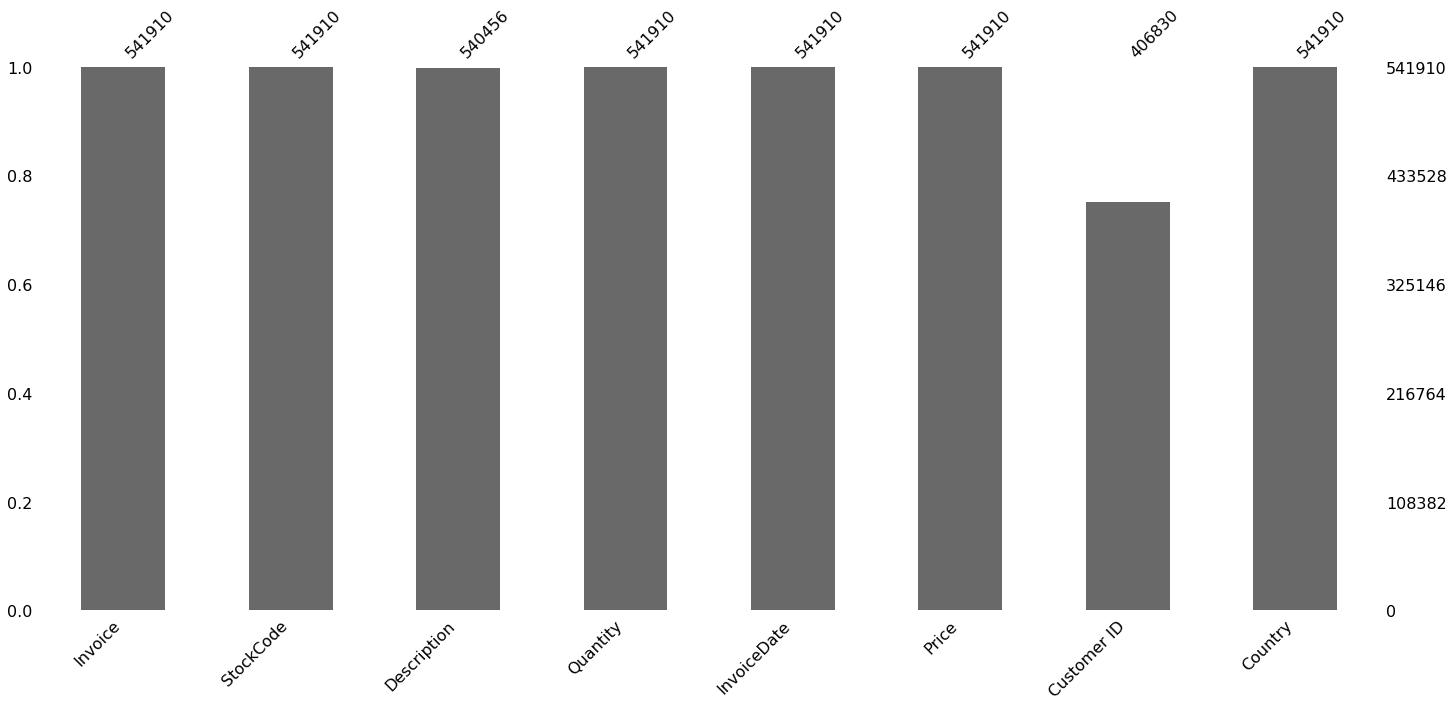

In [3]:
# catch NaN's
msno.bar(df);

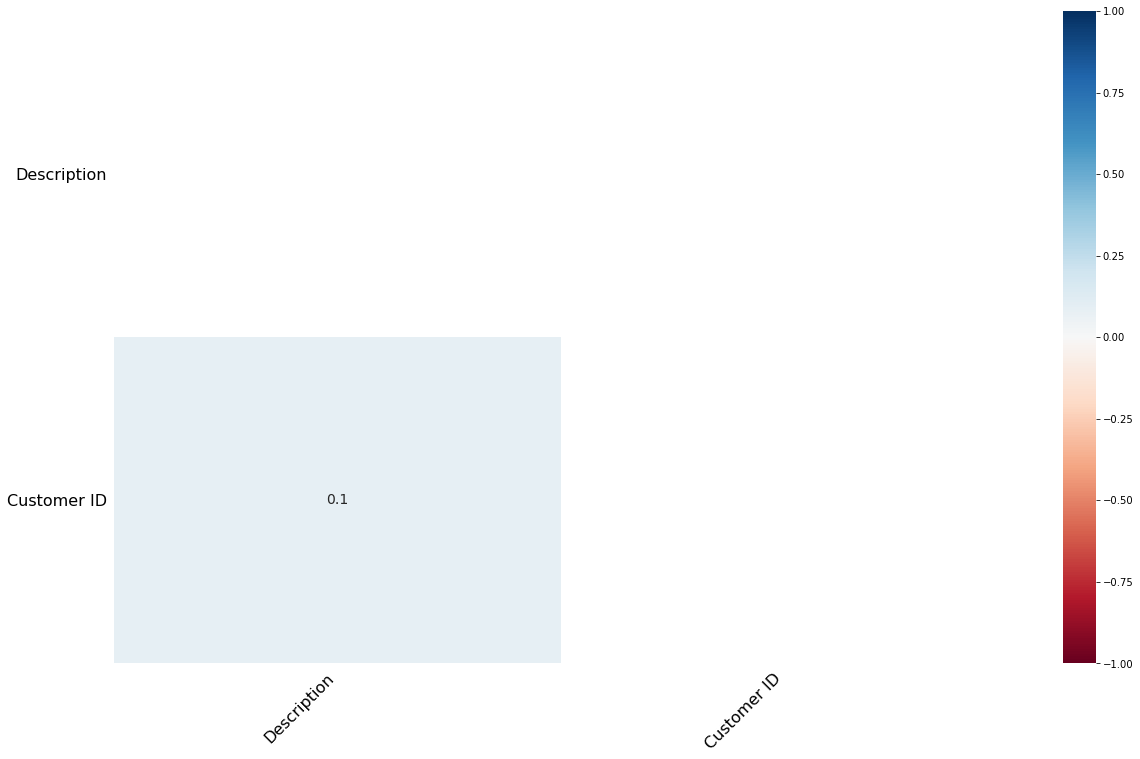

In [4]:
# Check if variables that have NaN values are related with other variables:
msno.heatmap(df);

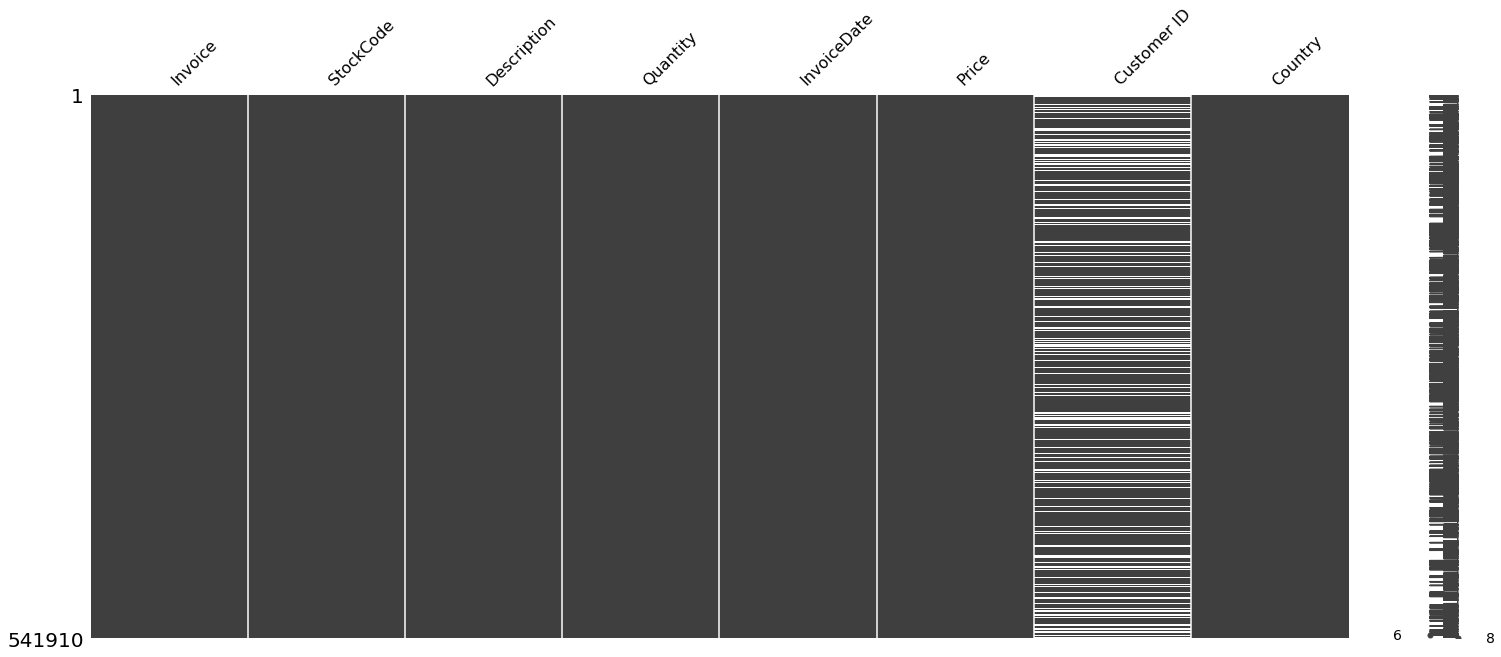

In [5]:
# White lines indicate absent values, gray parts indicate that there is no NaN value
msno.matrix(df);

In [6]:
# Number of unique products
df.Description.nunique()

4223

In [7]:
# Number of sales for each item
df.Description.value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: Description, dtype: int64

In [8]:
# Most ordered products
df.groupby("Description").agg({"Quantity": np.sum}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039


In [9]:
# Returned items
df[df.Invoice.str.contains("C", na=False)].head()
# df[df["Invoice"].astype("str").str.startswith("C", na=False)].head() ---> this code can be used as well.

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.00,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom


In [10]:
# products that were not returned
df[~df["Invoice"].astype("str").str.startswith("C", na=False)].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [11]:
# get rid of the rows that represent the returned products
df = df[~df["Invoice"].astype("str").str.startswith("C", na=False)] 

In [12]:
# Get rid of the rows with NaN
df.dropna(inplace=True)

## Recency (R)

In [13]:
# date of the oldest sale
df.InvoiceDate.min()

Timestamp('2010-12-01 08:26:00')

In [14]:
# date of the most recent sale
df.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

In [15]:
df.groupby("Customer ID").agg({"InvoiceDate": "max"}).head()

,InvoiceDate
Customer ID,
12346.00,2011-01-18 10:01:00
12347.00,2011-12-07 15:52:00
12348.00,2011-09-25 13:13:00
12349.00,2011-11-21 09:51:00
12350.00,2011-02-02 16:01:00


In [16]:
# Change the data type of Customer ID variable from float to integer
df["Customer ID"] = df["Customer ID"].astype(int)
df["Customer ID"].head()

0    17850
1    17850
2    17850
3    17850
4    17850
Name: Customer ID, dtype: int64

In [26]:
import datetime as dt

# Creation of recency_df dataframe which contains the recency values (days passed since the last sale) for each customer
today_date = dt.datetime.combine(df["InvoiceDate"].max().date(), dt.datetime.min.time()) 

# recency_df created by subtracting the last purchase day from today for each customer 
recency_df = today_date - df.groupby("Customer ID").agg({"InvoiceDate": max})
recency_df.rename(columns={"InvoiceDate": "Recency"}, inplace=True) # Rename the InvoiceDate as Recency
recency_df.head()

,Recency
Customer ID,
12346,324 days 13:59:00
12347,1 days 08:08:00
12348,74 days 10:47:00
12349,17 days 14:09:00
12350,309 days 07:59:00


In [27]:
# Another method to create recency dataframe:
recency_df = df.groupby("Customer ID").agg({"InvoiceDate": lambda x: (df.InvoiceDate.max() - x.max()).days})
recency_df.rename(columns = {"InvoiceDate":"Recency"}, inplace=True)
recency_df.head()

,Recency
Customer ID,
12346,325
12347,1
12348,74
12349,18
12350,309


## Frequency

In [28]:
# creating freq_df data frame which shows the total number of sale of each customer
freq_df = df.groupby("Customer ID").agg({"InvoiceDate": "nunique"}) # how many times a customer made a purchase? 
freq_df.rename(columns={"InvoiceDate": "Frequency"}, inplace=True) # change the column name as Frequency
freq_df.head()

,Frequency
Customer ID,
12346,1
12347,7
12348,4
12349,1
12350,1


## Monetary 

In [29]:
# Creating a column named "Total Price". 
df["TotalPrice"] = df.Quantity * df.Price
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [30]:
# creating monetary_df dataframe which shows the amount of money spent by each customer
monetary_df = df.groupby("Customer ID").agg({"TotalPrice": "sum"})
monetary_df.rename(columns={"TotalPrice": "Monetary"}, inplace=True)
monetary_df.head()

,Monetary
Customer ID,
12346,77183.60
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40


## RFM

In [31]:
# Check before concatenating the recency_df, freq_df and monetary_df data frames if they have the same size
print(recency_df.shape,freq_df.shape,monetary_df.shape)

(4339, 1) (4339, 1) (4339, 1)


In [32]:
# rfm dataframe created by concat method using recency_df, freq_df and monetary_df dataframes
rfm = pd.concat([recency_df, freq_df, monetary_df],  axis=1)
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,325,1,77183.60
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
12350,309,1,334.40


In [33]:
# Recency Score variable added to the rfm dataframe to show the recency values of the customers from 5 to 1
rfm["Recency Score"] = pd.qcut(rfm["Recency"], 5, labels = [5, 4 , 3, 2, 1]) # 5 aralığa küçükten büyüğe sıralayıp, böler.
rfm.head()

,Recency,Frequency,Monetary,Recency Score
Customer ID,,,,
12346,325,1,77183.60,1
12347,1,7,4310.00,5
12348,74,4,1797.24,2
12349,18,1,1757.55,4
12350,309,1,334.40,1


In [38]:
# rfm["Frequency"].rank(method="average").head()
# rfm["Frequency"].rank(method="min").head()
# rfm["Frequency"].rank(method="max").head()
# rfm["Frequency"].rank(method="dense").head()

# Şimdi burada değerler birbirine çok yakın olduğu için, bölemiyor. Örneğin 6 değerinde 20 tane var, o yüzden ayıramıyor.
# pd.qcut(rfm["Frequency"],5, labels=[1, 2, 3, 4, 5])


# Frequency Score variable added to the rfm dataframe to show the frequency of sales for each customer from 1 to 5
rfm["Frequency Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm.head()

,Recency,Frequency,Monetary,Recency Score,Frequency Score
Customer ID,,,,,
12346,325,1,77183.60,1,1
12347,1,7,4310.00,5,5
12348,74,4,1797.24,2,4
12349,18,1,1757.55,4,1
12350,309,1,334.40,1,1


In [39]:
# Monetary Score variable added to the rfm dataframe to show the amount of money spend by each customers from 1 to 5
rfm["Monetary Score"] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])
rfm.head()

,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score
Customer ID,,,,,,
12346,325,1,77183.60,1,1,5
12347,1,7,4310.00,5,5,5
12348,74,4,1797.24,2,4,4
12349,18,1,1757.55,4,1,4
12350,309,1,334.40,1,1,2


In [40]:
# Change each data type to string
(rfm['Recency Score'].astype(str) + 
 rfm['Frequency Score'].astype(str) + 
 rfm['Monetary Score'].astype(str)).head()

Customer ID
12346    115
12347    555
12348    244
12349    414
12350    112
dtype: object

In [41]:
# rfm scores were converted to categorical variables and added to the rfm dataframe
rfm["RFM Score"] = (rfm['Recency Score'].astype(str) + 
                    rfm['Frequency Score'].astype(str) + 
                    rfm['Monetary Score'].astype(str))
rfm.head()

,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,RFM Score
Customer ID,,,,,,,
12346,325,1,77183.60,1,1,5,115
12347,1,7,4310.00,5,5,5,555
12348,74,4,1797.24,2,4,4,244
12349,18,1,1757.55,4,1,4,414
12350,309,1,334.40,1,1,2,112


In [42]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4339.00,91.52,100.01,0.00,17.00,50.00,141.00,373.00
Frequency,4339.00,4.25,7.64,1.00,1.00,2.00,5.00,211.00
Monetary,4339.00,2053.80,8988.25,0.00,307.24,674.45,1661.64,280206.02


In [44]:
# Creation of RFM map by using regular expressions.
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm['Segment'] = rfm['Recency Score'].astype(str) + rfm['Frequency Score'].astype(str)
rfm.head()

,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,RFM Score,Segment
Customer ID,,,,,,,,
12346,325,1,77183.60,1,1,5,115,11
12347,1,7,4310.00,5,5,5,555,55
12348,74,4,1797.24,2,4,4,244,24
12349,18,1,1757.55,4,1,4,414,41
12350,309,1,334.40,1,1,2,112,11


In [45]:
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,RFM Score,Segment
Customer ID,,,,,,,,
12346,325,1,77183.60,1,1,5,115,Hibernating
12347,1,7,4310.00,5,5,5,555,Champions
12348,74,4,1797.24,2,4,4,244,At Risk
12349,18,1,1757.55,4,1,4,414,Promising
12350,309,1,334.40,1,1,2,112,Hibernating


In [46]:
rfm[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count"])

Recency              Frequency              Monetary  \
                       mean median count      mean median count     mean   
Segment                                                                    
About to Sleep        52.55  52.00   352      1.16      1   352   461.65   
At Risk              154.32 139.00   581      2.85      3   581  1071.69   
Can't Loose          130.50 105.50    64      8.31      7    64  2791.01   
Champions              4.88   4.00   632     12.34      8   632  6866.78   
Hibernating          216.95 218.00  1063      1.10      1  1063   487.92   
Loyal Customers       32.54  28.00   828      6.42      5   828  2855.39   
Need Attention        51.93  52.00   183      2.32      2   183   885.93   
New Customers          5.86   6.00    42      1.00      1    42   388.21   
Potential Loyalists   16.10  17.00   494      2.01      2   494  1035.04   
Promising             22.35  22.00   100      1.00      1   100   351.80   

                                   
                     median count  
Segment                            
About to Sleep       332.12   352  
At Risk              675.80   581  
Can't Loose         2236.74    64  
Champions           2613.85   632  
Hibernating          292.47  1063  
Loyal Customers     1737.83   828  
Need Attention       637.50   183  
New Customers        274.50    42  
Potential Loyalists  521.28   494  
Promising            221.43   100

In [47]:
loyal_df = pd.DataFrame()
loyal_df["Loyal Customer ID"] = rfm[rfm["Segment"] == "Loyal Customers"].index
loyal_df.head()

,Loyal Customer ID
0,12352
1,12359
2,12370
3,12380
4,12388


In [ ]:
loyal_df.to_excel("loyal_customers.xlsx") # save the loyal customers to an excel file